In [1]:
import sys
# !{sys.executable} setup.py install
import pennylane as qml
import numpy as np
from quantum.circuits.Ansatz import rotation_layer
from quantum.circuits.Old_Ansatz import efficient_su2, two_local, modified_pauli_two, hadamard_ansatz, excitation_preserving

In [2]:
wires = [0,1,2,3]
dev = qml.device('default.qubit', wires=wires)

(<Figure size 500x500 with 1 Axes>, <Axes: >)

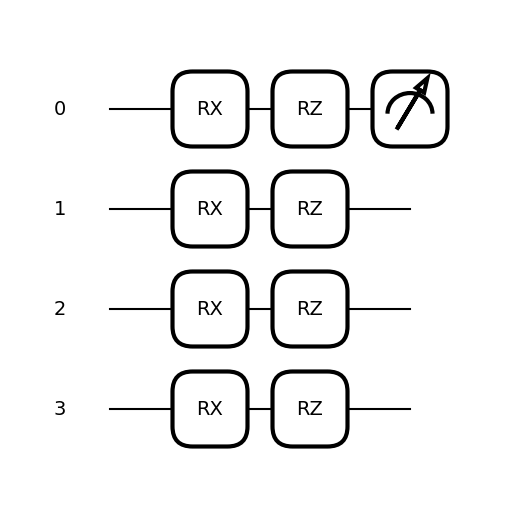

In [3]:
@qml.qnode(dev)
def circuit(params):
    rotation_layer(params, wires, False)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(8).tolist())

(<Figure size 800x500 with 1 Axes>, <Axes: >)

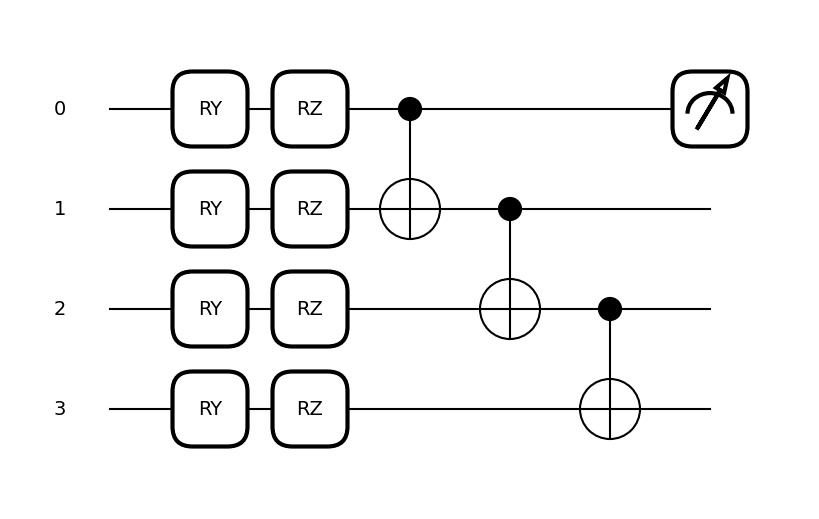

In [4]:
@qml.qnode(dev)
def circuit(params):
    efficient_su2(params, wires, skip_final_rot=True)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(8).tolist())

(<Figure size 800x500 with 1 Axes>, <Axes: >)

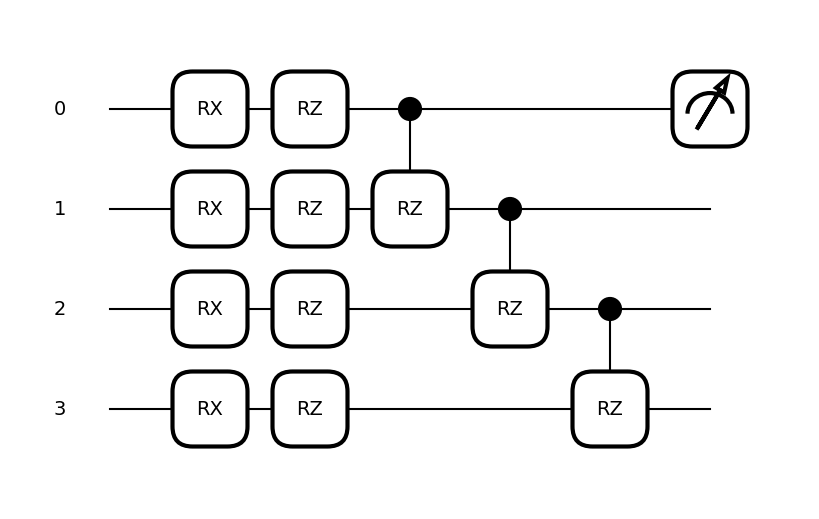

In [5]:
@qml.qnode(dev)
def circuit(params):
    two_local(params, wires, rot_gates=['rx', 'rz'], entangle_gates='crz', skip_final_rot=True)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(11).tolist())

(<Figure size 1900x500 with 1 Axes>, <Axes: >)

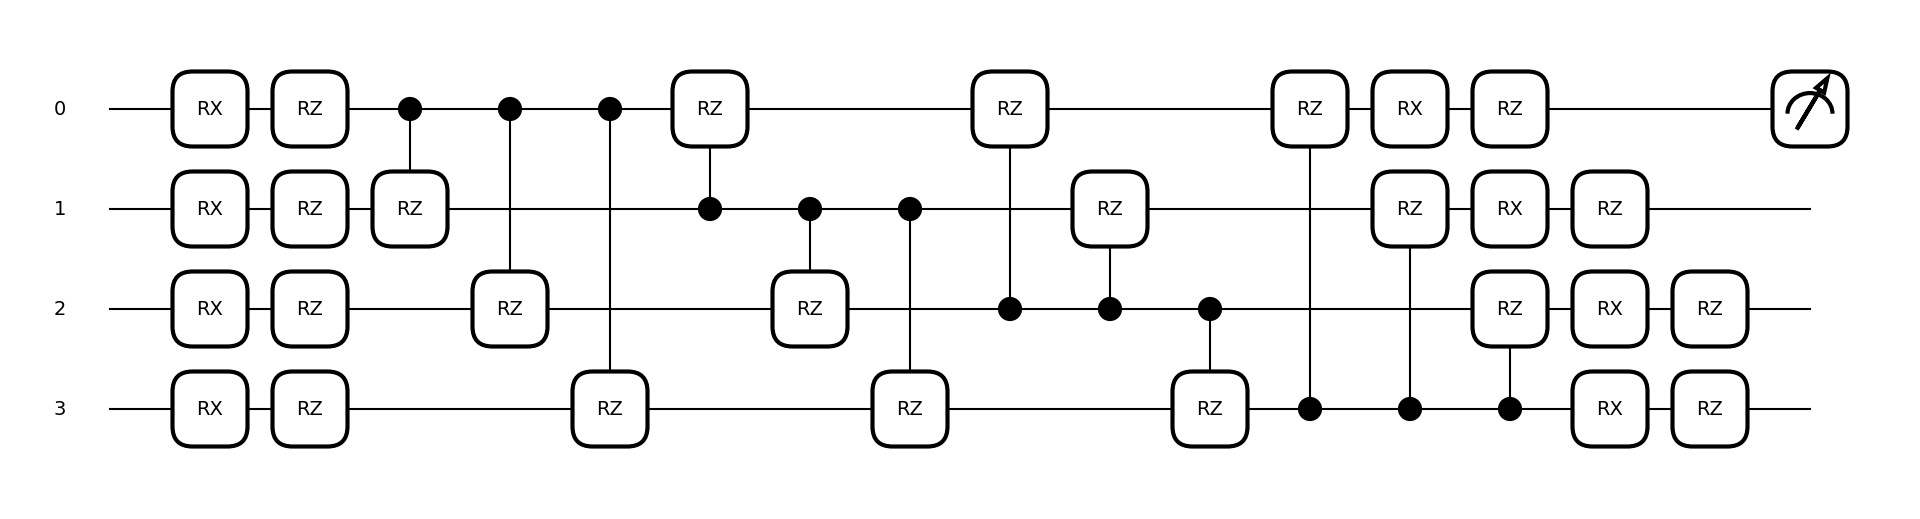

In [6]:
entanglement= [(0,1), (0,2), (0,3), (1,0), (1,2), (1,3), (2,0), (2,1), (2,3), (3,0), (3,1), (3,2)]
@qml.qnode(dev)
def circuit(params):
    two_local(params, wires, rot_gates=['rx', 'rz'], entangle_gates='crz', entanglement=entanglement, skip_final_rot=False)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(28))

(<Figure size 900x500 with 1 Axes>, <Axes: >)

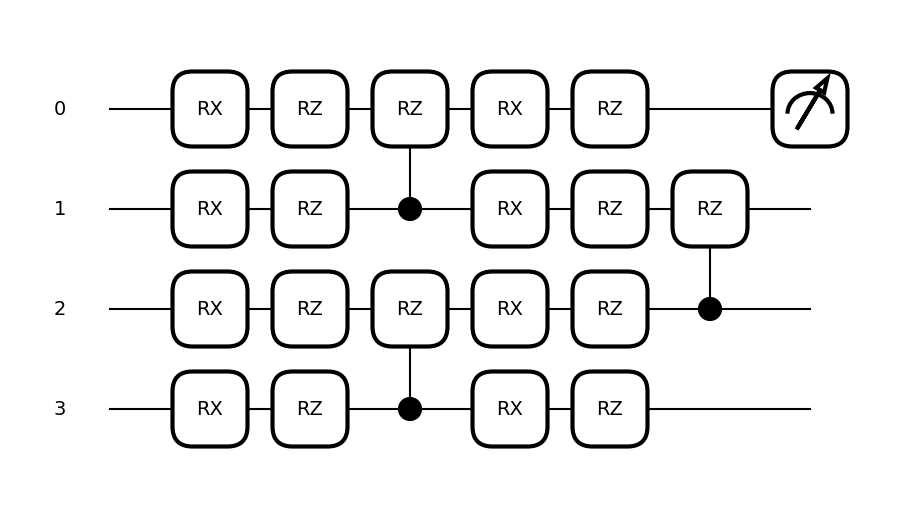

In [7]:
@qml.qnode(dev)
def circuit(params):
    modified_pauli_two(params, wires, rotation_block=['rx', 'rz'])
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(19))

(<Figure size 900x500 with 1 Axes>, <Axes: >)

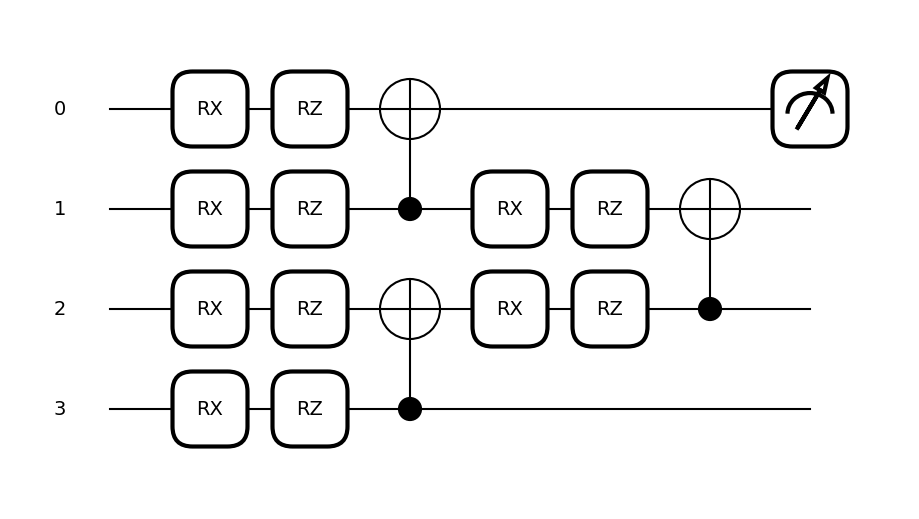

In [8]:
@qml.qnode(dev)
def circuit(params):
    modified_pauli_two(params, wires, entanglement='cnot', full_rotation=False)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(12))

(<Figure size 800x500 with 1 Axes>, <Axes: >)

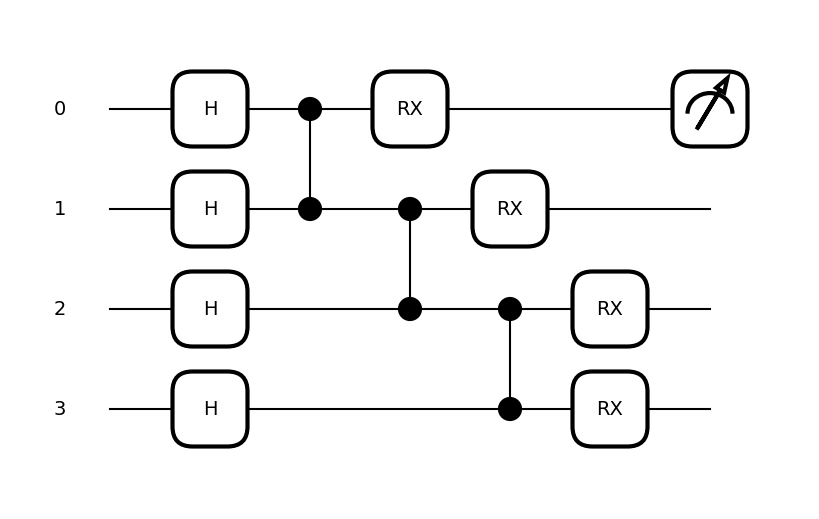

In [9]:
@qml.qnode(dev)
def circuit(params):
    hadamard_ansatz(params, wires)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(4))

(<Figure size 1100x500 with 1 Axes>, <Axes: >)

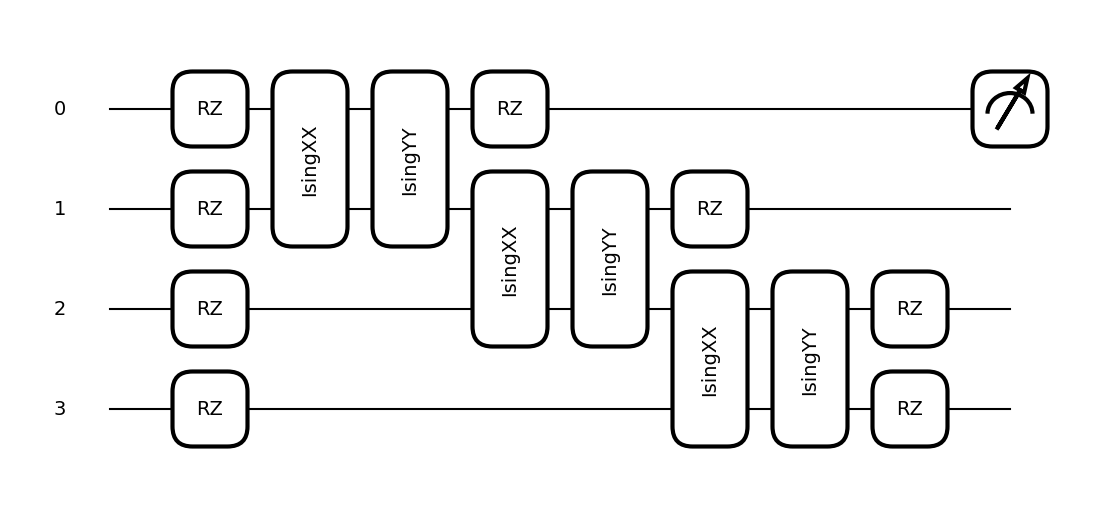

In [10]:
@qml.qnode(dev)
def circuit(params):
    excitation_preserving(params, wires)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(11))